Plot saved: 1_Linear_Regression.png
Plot saved: 2_Polynomial_Regression.png
Plot saved: 3_Ridge_Regression.png
Plot saved: 4_Lasso_Regression.png
Plot saved: 5_ElasticNet_Regression.png
Logistic Regression Accuracy: 1.00
Plot saved: 6_Logistic_Regression.png
Plot saved: 7_Support_Vector_Regression.png
✅ All regression models completed and plots saved to Desktop folder.


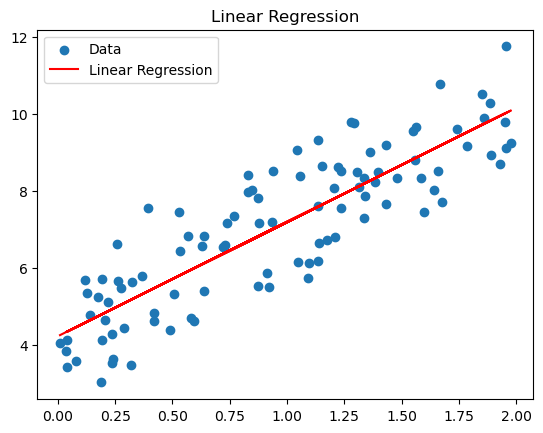

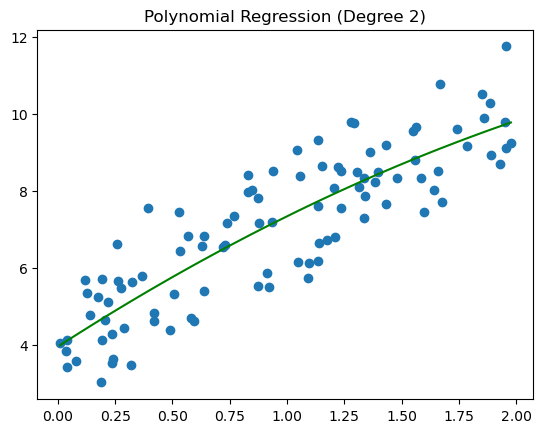

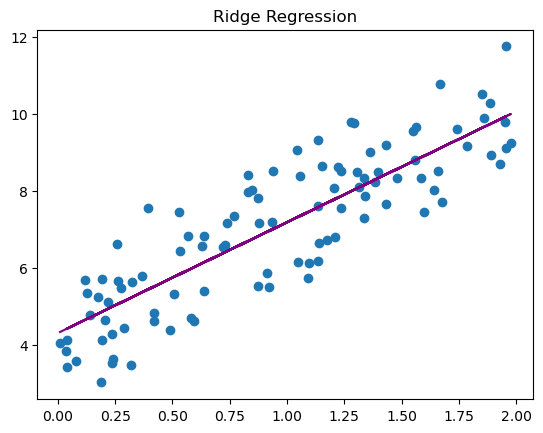

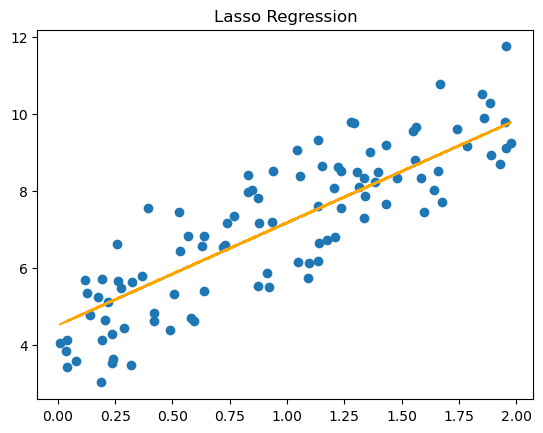

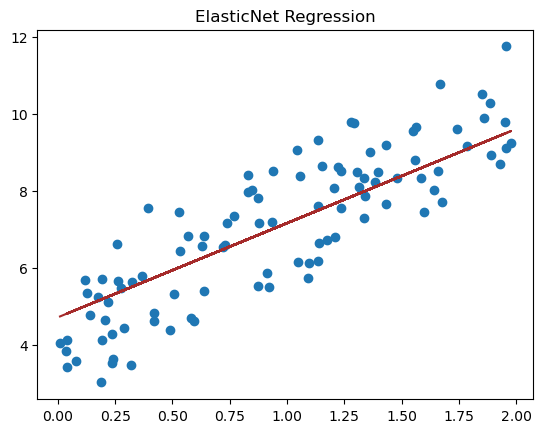

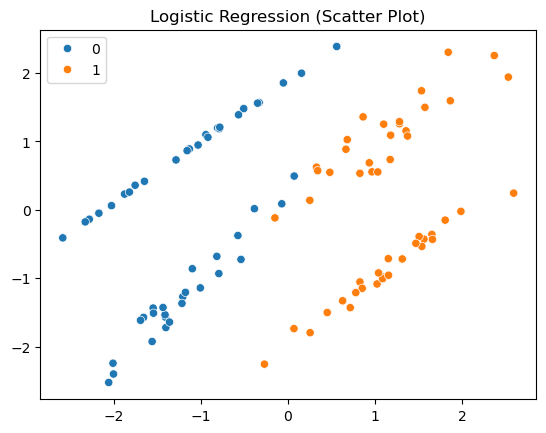

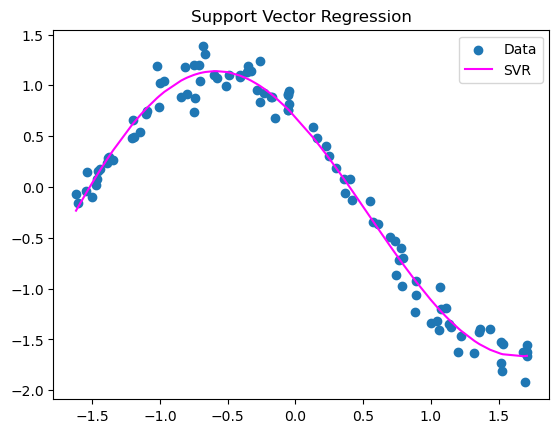

In [1]:
# Cell 1: Install necessary libraries (run only once)
!pip install numpy pandas matplotlib scikit-learn statsmodels seaborn

# Cell 2: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import os

# Cell 3: Set path and create directory if not exists
save_path = r"C:\Users\anush\OneDrive\Desktop\ML ASSIGNMENT1"
os.makedirs(save_path, exist_ok=True)

# Helper function to save plots
def save_plot(fig, name):
    fig.savefig(os.path.join(save_path, f"{name}.png"))
    print(f"Plot saved: {name}.png")

# Cell 4: Generate dummy data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Cell 5: 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y, label="Data")
ax.plot(X, y_pred, color='red', label="Linear Regression")
ax.set_title("Linear Regression")
ax.legend()
save_plot(fig, "1_Linear_Regression")

# Cell 6: 2. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_poly_pred = poly_reg.predict(X_poly)

fig, ax = plt.subplots()
ax.scatter(X, y)
sorted_zip = sorted(zip(X[:, 0], y_poly_pred))
X_plot, y_plot = zip(*sorted_zip)
ax.plot(X_plot, y_plot, color='green')
ax.set_title("Polynomial Regression (Degree 2)")
save_plot(fig, "2_Polynomial_Regression")

# Cell 7: 3. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
y_ridge = ridge.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_ridge, color='purple')
ax.set_title("Ridge Regression")
save_plot(fig, "3_Ridge_Regression")

# Cell 8: 4. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_lasso = lasso.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_lasso, color='orange')
ax.set_title("Lasso Regression")
save_plot(fig, "4_Lasso_Regression")

# Cell 9: 5. ElasticNet Regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X, y)
y_enet = enet.predict(X)

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_enet, color='brown')
ax.set_title("ElasticNet Regression")
save_plot(fig, "5_ElasticNet_Regression")

# Cell 10: 6. Logistic Regression
# Classification problem
from sklearn.datasets import make_classification
X_log, y_log = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_log_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

fig, ax = plt.subplots()
sns.scatterplot(x=X_log[:, 0], y=X_log[:, 1], hue=y_log, ax=ax)
ax.set_title("Logistic Regression (Scatter Plot)")
save_plot(fig, "6_Logistic_Regression")

# Cell 11: 7. Support Vector Regression (SVR)
X_svr = np.sort(5 * np.random.rand(100, 1), axis=0)
y_svr = np.sin(X_svr).ravel() + np.random.randn(100) * 0.1

sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_svr)
y_scaled = sc_y.fit_transform(y_svr.reshape(-1, 1)).flatten()

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_scaled, y_scaled)
y_svr_pred = svr_rbf.predict(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_scaled, y_scaled, label="Data")
ax.plot(X_scaled, y_svr_pred, color='magenta', label="SVR")
ax.set_title("Support Vector Regression")
ax.legend()
save_plot(fig, "7_Support_Vector_Regression")

print("✅ All regression models completed and plots saved to Desktop folder.")
